# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [7]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [8]:
def has_transitioned(prob):
    r = random.random()
    if r > prob:
        return False
    else:
        return True

In [9]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [12]:
def evolveOne(currentState, rules):
    firstState = []
    secondState = []
    prob = []
    
    for first, second, third in rules:
        firstState.append(first)
        secondState.append(second)
        prob.append(third)
        
    for i in range(len(firstState)):
        if currentState == firstState[i]:
            if has_transitioned(prob[i]) == True:
                return secondState[i]
            else:
                return firstState[i]
    else:
        return currentState

In [13]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [14]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [49]:
def evolveMany(states, rules):
    stateTwo = []
    for i in states:
        stateTwo.append(evolveOne(i,rules))
    return stateTwo



In [50]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [51]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)
    
    A_count[0] = NA 
    B_count[0] = NB
    C_count[0] = NC
    
    for i in range(1, n_step+1):
        state = evolveMany(state, rules)
        A_count[i] = state.count('A')
        B_count[i] = state.count('B')
        C_count[i] = state.count('C')
    
    print(A_count)
    print(B_count)
    print(C_count)

    return A_count, B_count, C_count



In [52]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

[ 0  0  0  2  3  4  5  6  8 11 13 13 17 18 21 23 28 30]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[250 250 250 248 247 246 245 244 242 239 237 237 233 232 229 227 222 220]


In [53]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

[200 213 233 250 258 251 266 263 259 260 265 259 256 255 258 256 259 253
 249 247 253]
[200 198 201 206 205 214 214 212 216 221 225 234 236 238 234 235 231 245
 253 256 252]
[200 189 166 144 137 135 120 125 125 119 110 107 108 107 108 109 110 102
  98  97  95]


## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




[  0  21  42  62  81  91 105 109 118 133 143 151 154 163 163 169 166 164
 160 158 160 159 152 153 147 147 148 142 136 131 130 124 126 121 118 113
 112 109 107 106 103  99  99  98  95  94  94  94  93  93  93  96  96  94
  96  96  99 101  97  97 104 103  97  96  93  93  93  89  86  88  88  89
  85  86  82  81  76  72  70  65  67  66  69  70  71  70  72  77  75  77
  79  81  81  83  82  82  81  83  81  83  83  83  80  79  79  77  81  82
  82  78  79  84  83  82  83  85  84  86  87  89  90  88  90  88  87  84
  84  82  81  81  80  80  78  78  79  82  85  84  83  81  80  82  84  84
  82  81  77  75  74  75  74  74  75  74  73  73  73  74  75  78  81  84
  83  85  86  85  88  83  84  87  85  87  88  90  89  91  89  93  95  92
  96  97  95  94  94  93  93  93  90  90  87  85  87  89  86  83  87  90
  91  88  88]
[  0   0   0   3   3   6   8  12  12  16  19  21  21  26  32  36  41  49
  52  58  59  62  69  72  77  78  81  87  91  93  96 103 104 109 113 115
 117 121 116 116 122 125 128 127 128 

Text(0.5,1,'Plot Showing The Number Of Nuclei Over a Period Of Time')

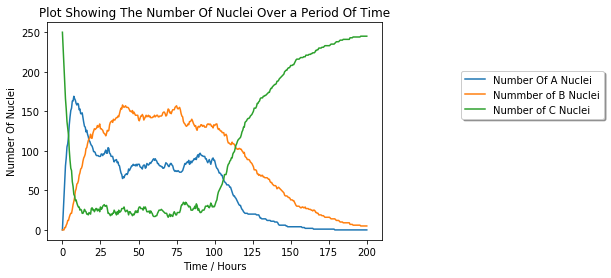

In [54]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2

def decayProb(t_half):
    dt = t_total/nsteps
    tau = t_half/numpy.log(2)
    solution1 = dt/tau
    return solution1

rules1 = [
    ('A', 'B', decayProb(t_half_A)),
    ('B', 'C', decayProb(t_half_B)),
    ('C', 'A', decayProb(t_half_C))
]

Aa, Bb, Cc = evolve_system(0,0,250,rules1,nsteps)

A1 = Aa[-1]
B1 = Bb[-1]
C1 = Cc[-1]

rules2 = [
    ('A', 'B', decayProb(t_half_A)),
    ('B', 'C', decayProb(t_half_B)),
]

Aa1, Bb1, Cc1 = evolve_system(A1, B1, C1, rules2, nsteps)

numA = numpy.append(Aa, Aa1[1:])
numB = numpy.append(Bb, Bb1[1:])
numC = numpy.append(Cc, Cc1[1:])

timeRange = []

t0 = 0 
for i in range(2*nsteps+1):
    timeRange.append(t0)
    t0 += 0.5
    
plt.plot(timeRange, numA, label = 'Number Of A Nuclei')
plt.plot(timeRange, numB, label = 'Nummber of B Nuclei')
plt.plot(timeRange, numC, label = 'Number of C Nuclei')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('Time / Hours')
plt.ylabel('Number Of Nuclei')
plt.title('Plot Showing The Number Of Nuclei Over a Period Of Time')


Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


[  0  22  39  61  77 100 115 120 121 123 128 129 137 140 142 141 146 150
 153 151 151 149 150 152 152 148 149 146 146 149 142 136 134 133 131 135
 136 133 133 133 126 126 124 121 118 115 107 107 107 103 102 100  97 100
 102 103 104 101  98  94  92  97  96  99  97  99 100  98  94  93  89  88
  89  89  85  77  77  78  78  74  76  78  77  74  74  74  73  73  72  66
  67  66  71  76  73  79  82  82  80  77  78  82  80  81  78  82  78  78
  81  80  79  83  82  83  84  84  86  86  82  82  82  85  84  85  86  85
  85  87  84  83  81  84  81  85  86  85  86  84  82  79  83  86  87  83
  83  86  84  83  81  78  77  78  76  79  79  77  76  78  78  80  78  77
  72  73  75  75  75  76  77  79  80  80  80  78  79  80  81  80  78  81
  81  83  82  83  86  81  83  84  85  84  86  86  87  88  88  88  86  85
  86  86  85]
[  0   0   0   1   5   6   9  15  23  29  32  34  37  40  42  45  48  49
  51  59  59  63  64  65  70  75  71  72  72  73  78  84  84  86  87  90
  91  94  95  96 100  99  99 105 109 

[  0  27  45  65  90 109 114 128 128 132 135 138 139 140 148 147 147 148
 145 146 147 142 142 144 144 140 139 136 132 126 125 118 113 110 106 106
 104 105 102 100 100 102 102 100 100 103 101  99 100 100 102 103 103 106
 107 107 103  98 100  95  94  95  96  97  97  93  92  91  92  89  89  92
  92  91  89  88  89  94  92  90  91  89  88  90  87  81  80  79  81  75
  71  75  77  77  73  73  74  75  77  77  77  75  78  80  85  86  85  86
  87  90  90  90  89  86  83  77  78  78  78  81  82  86  88  85  85  82
  82  81  82  86  89  90  92  95  92  89  95  93 100 102 100  99 100  99
  98 104 101 102  98  99 101  97  93  93  93  89  87  88  84  83  85  85
  83  81  77  75  76  72  73  74  73  74  76  79  81  80  82  85  84  83
  83  81  83  82  82  84  84  83  85  84  84  88  88  93  90  91  87  89
  89  94  96]
[  0   0   2   4   7   9  13  15  21  25  28  31  36  42  45  48  56  60
  67  68  70  77  80  83  82  91  92  94  98 104 105 112 112 112 115 116
 121 121 124 127 128 126 125 128 124 

[  0  22  52  61  81  94 112 131 142 155 161 161 167 168 171 171 171 171
 173 173 167 160 157 153 152 151 151 149 145 138 135 132 124 124 123 121
 121 120 121 119 119 123 116 110 109 102 101 101 100  98  96  94  93  93
  92  91  91  94  93  96  95  97  94  89  90  91  91  92  91  91  90  88
  88  87  88  85  91  89  88  91  87  89  87  84  83  87  90  89  86  86
  89  89  81  82  84  86  88  87  84  86  88  83  82  81  84  82  84  80
  80  80  83  84  87  91  93  96  92  95  92  89  86  85  82  88  89  88
  85  85  83  82  83  83  85  90  92  96  95  95  97  95  96  94  94  98
  98  99  95  94  93  97  95  89  89  89  91  88  86  85  86  86  85  87
  85  84  88  84  83  84  78  75  79  80  79  84  88  88  90  87  89  87
  88  83  83  80  80  79  78  79  78  80  81  84  88  84  83  83  85  85
  85  86  88]
[  0   0   0   4   8   9  12  15  19  20  22  28  29  33  36  41  43  48
  51  55  62  68  71  72  76  79  81  82  84  91  96  99 106 104 103 104
 100 105 103 105 104 103 109 116 120 

[  0  30  47  65  77  88  94 103 112 116 124 130 135 133 134 142 144 137
 139 140 140 143 140 139 140 141 140 141 139 135 133 132 127 127 125 126
 123 125 118 116 119 122 122 124 123 118 121 123 120 118 113 113 111 109
 107 102 101  99  98  98 103 105 102  98  96  95  92  94  95  94  94  91
  92  92  87  87  90  88  86  88  85  91  90  87  87  86  85  82  80  80
  80  82  81  79  78  70  69  70  70  67  72  71  68  66  67  64  66  69
  71  70  73  74  77  77  75  77  76  76  80  79  83  84  82  83  86  87
  87  87  89  89  91  87  82  81  83  88  87  89  90  93  91  90  87  90
  88  86  86  87  86  86  87  85  85  84  84  87  90  91  87  88  89  89
  86  88  88  89  89  89  90  95  96  96  95  94  95  97  96  95  94  95
  97  98  94  93  97  96  97  97  97  99  97  95  99  95  94  96  95  95
  92  91  92]
[  0   0   1   6   8  10  17  22  28  31  35  38  39  47  53  55  59  65
  70  73  75  73  76  76  77  84  84  84  85  88  90  92  93  93  90  92
  92  90  95  97  98  99 100 100 101 

[  0  29  56  75  89 105 113 121 133 135 142 144 144 147 145 148 146 143
 142 139 145 143 139 136 131 129 127 129 125 120 121 118 111 111 110 112
 110 110 109 109 111 107 103 104 102 100 100  97 101 103 102  99  97  95
  96  93  92  90  89  88  86  83  80  79  80  82  82  80  79  77  75  75
  71  73  78  77  76  74  80  82  81  85  85  89  93  92  90  89  89  89
  89  91  92  93  91  91  89  89  91  88  88  87  86  86  86  86  86  88
  88  88  89  84  88  88  81  81  78  79  81  78  80  82  86  88  87  81
  83  79  80  81  85  85  85  88  88  90  91  92  91  89  86  84  84  83
  78  82  86  90  91  96  98  95  95  96  97  98  97  94  94  96  92  91
  92  92  94  93  92  89  90  86  86  88  89  87  90  91  90  90  90  87
  87  87  90  84  79  81  80  78  81  81  80  81  79  80  82  85  86  87
  86  86  87]
[  0   0   1   3   4   7  12  13  19  25  27  30  38  41  45  50  54  59
  65  69  71  73  78  84  92  95  94  94  99 107 105 107 112 110 112 111
 113 110 115 115 115 116 120 123 126 

[  0  24  49  69  81  96 113 127 135 152 155 160 165 166 169 172 169 168
 168 164 167 165 161 151 153 150 149 143 141 139 134 128 121 120 121 120
 117 119 114 112 114 107 105 105 103  98  95  95  97  96  94  93  94  94
  91  91  93  95  94  96  92  94  87  86  87  84  82  77  76  77  79  77
  75  80  81  79  76  76  79  78  79  80  82  80  81  83  86  83  81  86
  93  94  99  99  97  96  98  98  91  89  84  81  80  82  81  83  81  82
  79  80  82  81  78  79  76  78  78  78  82  81  80  79  80  79  79  81
  82  78  80  83  84  82  82  81  81  78  85  82  78  77  80  81  80  82
  85  89  93  92  91  90  90  89  88  87  84  87  88  89  89  91  89  89
  91  85  86  85  83  80  81  82  78  77  82  81  82  85  85  83  86  87
  86  88  87  85  87  86  87  88  85  86  88  86  84  86  87  86  86  85
  89  89  87]
[  0   0   0   1   3   4   9  11  15  18  23  25  30  36  37  39  43  45
  51  58  61  61  66  74  78  79  81  88  90  93  94 100 111 113 113 112
 114 114 119 121 124 126 127 127 130 

[  0  28  51  73  95 104 120 133 142 149 159 162 168 168 168 165 169 167
 169 164 164 160 159 157 156 154 150 147 147 141 136 130 127 127 123 119
 116 115 112 110 109 108 106 103 100  99  98  95  93  92  97  96  92  92
  93  89  89  92  93  95  97  97 100 107 106 108 109 111 109 112 110 108
 107 108 108 110 111 111 108 105 104  97  95  96  89  84  84  85  85  85
  86  83  84  81  82  85  84  89  88  85  84  86  83  83  83  85  87  87
  84  84  87  86  86  88  90  89  85  85  83  83  85  82  81  82  83  84
  82  79  79  76  73  73  74  78  78  73  70  71  70  67  67  67  69  69
  70  74  76  78  79  80  79  78  79  82  83  85  85  89  93  91  93  93
  91  85  81  79  78  78  76  76  71  71  71  74  77  77  72  74  74  69
  68  73  74  79  77  76  78  80  77  79  75  78  79  79  77  76  77  80
  75  78  78]
[  0   0   0   0   1   4   7   9  13  15  19  23  27  32  39  47  51  52
  53  58  60  63  67  69  70  71  77  81  82  89  96 102 107 109 113 114
 117 120 121 124 124 123 126 125 128 

Text(0.5,1,'Average Number of "A" Nuclei Over 20 Simulations')

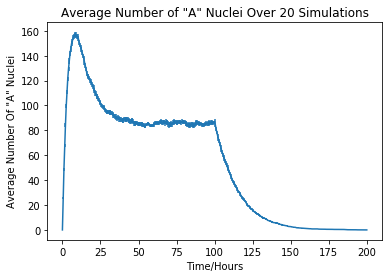

In [55]:
nsim = 20

Aa2 = []
Aa3 = []

for i in range(nsim):
    a1, b1, c1 = evolve_system(0,0,250,rules1,nsteps)
    a2, b2, c2 = evolve_system(a1[-1], b1[-1], c1[-1], rules2, nsteps) #To get the last element of the previous bit for the first element
    Aa2.append(a1)
    Aa3.append(a2[1:]) #To get everthing but the first element
    
s = (2*nsteps)+1

Averages = numpy.empty(s)
stDevs = numpy.empty(s)
    
for i in range(nsteps+1):
    VariableOne = numpy.empty(nsim)
    for j in range(nsim):
        VariableOne[j] = Aa2[j][i]
    Averages[i] = numpy.average(VariableOne)
    stDevs[i] = numpy.std(VariableOne)


for i in range(nsteps):
    VariableTwo = numpy.empty(nsim)
    for j in range(nsim):
        VariableTwo[j] = Aa3[j][i]
    Averages[(nsteps+1)+i] = numpy.average(VariableTwo) #200 steps already completed
    stDevs[(nsteps+1)+i] = numpy.std(VariableTwo)

Times = numpy.empty(s)
for i in range(s):
    Times[i] = (i/2)

Calculation = 20**0.5 #Formula

plt.errorbar(Times, Averages, xerr = 0, yerr=stDevs/Calculation)
plt.xlabel('Time/Hours')
plt.ylabel('Average Number Of "A" Nuclei')
plt.title('Average Number of "A" Nuclei Over 20 Simulations')